# **LATAR BELAKANG**
New York City adalah salah satu kota terbesar dan paling padat di dunia, dengan kebutuhan transportasi yang tinggi. Data trip taksi dari dua vendor utama, Creative Mobile Technologies, LLC dan VeriFone Inc., menyediakan informasi berharga tentang pola perjalanan, preferensi penumpang, dan kinerja pengemudi taksi di kota ini. Analisis data ini penting untuk memahami dinamika transportasi kota dan dapat membantu dalam pengambilan keputusan untuk perbaikan layanan.

# **PERNYATAAN MASALAH BISNIS**
Bagaimana kita bisa memanfaatkan data perjalanan taksi untuk meningkatkan efisiensi operasional, memahami pola perjalanan, dan meningkatkan pengalaman pelanggan di New York City?

# **TUJUAN**
1. Memahami distribusi perjalanan taksi berdasarkan vendor, lokasi, dan waktu.
2. Mengidentifikasi pola perjalanan dan preferensi pembayaran penumpang.
3. Menemukan potensi perbaikan dalam operasi taksi.
4. Memberikan rekomendasi untuk meningkatkan layanan taksi berdasarkan temuan data.

# **DATA**

In [72]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import IsolationForest
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")


Dataset ini berisi data perjalanan taksi di NYC, dengan setiap baris mewakili satu perjalanan. Kolom-kolom dalam dataset ini termasuk:

| Kolom | Deskripsi |
| --- | --- |
| VendorID | Kode yang menunjukkan penyedia LPEP yang memberikan catatan. |
| lpep_pickup_datetime | Tanggal dan waktu ketika meter diaktifkan. |
| lpep_dropoff_datetime | Tanggal dan waktu ketika meter dinonaktifkan. |
| Passenger_count | Jumlah penumpang dalam kendaraan. |
| Trip_distance | Jarak perjalanan yang ditempuh dalam mil yang dilaporkan oleh taksi meter. |
| PULocationID | Zona Taksi TLC di mana taksi meter diaktifkan. |
| DOLocationID | Zona Taksi TLC di mana taksi meter dinonaktifkan. |
| RateCodeID | Kode tarif akhir yang berlaku pada akhir perjalanan. |
| Store_and_fwd_flag | Bendera ini menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor. |
| Payment_type | Kode numerik yang menunjukkan bagaimana penumpang membayar perjalanan. |
| Fare_amount | Tarif waktu dan jarak dihitung oleh meter. |
| Extra | Ekstra dan biaya tambahan. |
| MTA_tax | $0.50 Pajak MTA yang dipicu secara otomatis berdasarkan pada tarif yang digunakan. |
| Improvement_surcharge | $0.30 biaya perbaikan yang dinilai pada perjalanan yang dipanggil perjalanan di bendera drop. |
| Tip_amount | Bidang ini secara otomatis diisi untuk kartu kredit tips. Tips tunai tidak termasuk. |
| Tolls_amount | Jumlah total semua tol yang dibayar dalam perjalanan. |
| Total_amount | Jumlah total yang dibebankan kepada penumpang. Tidak termasuk tips tunai. |
| Trip_type | Kode yang menunjukkan apakah perjalanan adalah panggilan jalanan atau pengiriman yang secara otomatis ditugaskan berdasarkan pada tarif yang digunakan tetapi dapat diubah oleh pengemudi. |

Berikut 5 baris teratas dan terbawah dari dataset hr_analitycs.

In [73]:
df=pd.read_csv('nyc.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


# **Data Understanding and Cleaning**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset hr_analytics.

In [74]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [75]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N
freq,4,6,63579


In [76]:
pd.set_option('display.max_colwidth', None)  # Mengganti -1 dengan None
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

Secara umum, kita bisa melihat bahwa:

<ul>
<li>dataset memiliki 19 kolom dan 68.211 baris</li>
<li>beberapa kolom, yaitu, RateCodeID, store_and_fwd_flag, congestion_surcharge memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.</li>
<li>kolom passenger_count berisikan jumlah penumpang, sehingga relevan dalam analisis.</li>
<li>kolom trip_distance memiliki data tipe numerik yang menunjukkan jarak perjalanan dalam mil.</li>
<li>kolom fare_amount, extra, MTA_tax, improvement_surcharge, tip_amount, tolls_amount, total_amount memiliki data numerik yang menunjukkan berbagai komponen tarif.</li>
<li>beberapa data kategorik ordinal, bisa dibuatkan kolom baru berdasarkan ranking kategorinya untuk memudahkan analisis (opsional)</li>
</ul>

# Missing Value

In [77]:
# Memeriksa jumlah nilai yang hilang per kolom
missing_values = df.isna().sum()
print("Jumlah Nilai Kosong per Kolom:")
print(missing_values)

# Menghitung persentase nilai yang hilang per kolom
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase Nilai Kosong per Kolom:")
print(missing_percentage)


Jumlah Nilai Kosong per Kolom:
VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

Persentase Nilai Kosong per Kolom:
VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distanc

<Axes: >

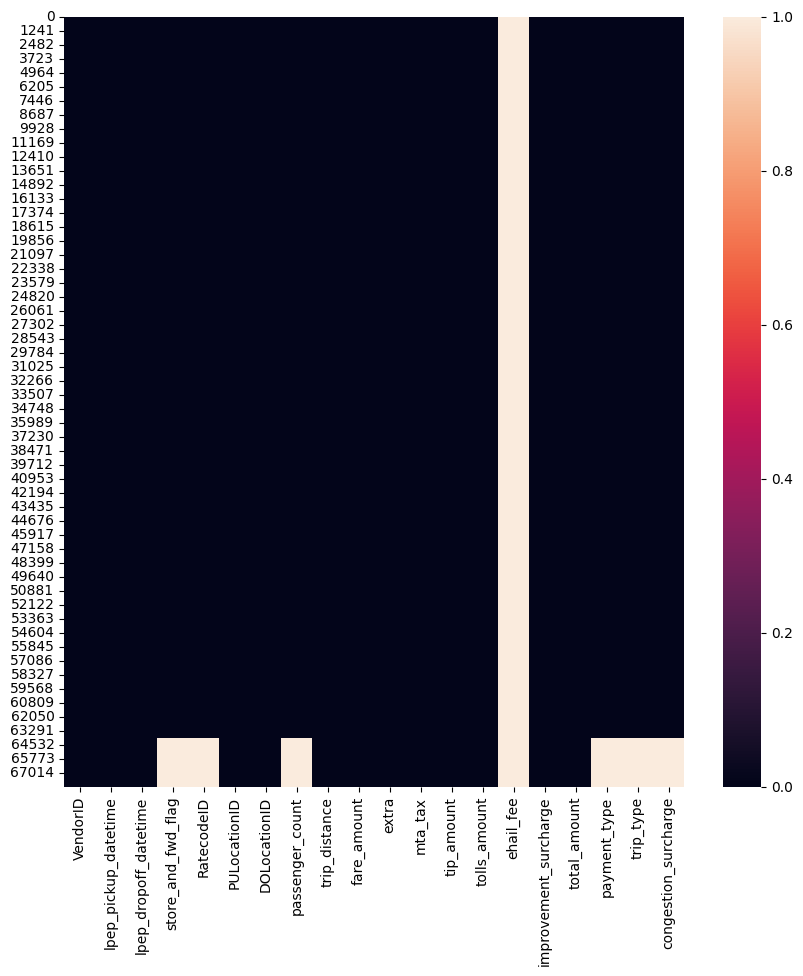

In [78]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

Secara garis besar:
<ul>
<li>Kolom-kolom yang memiliki proporsi missing valye cukup tinggi (>6%) adalah store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type, congestion_surcharge</li>
<li>Nilai yang hilang di kolom ehail_fee bahkan mencapai 100%</li>
</ul>


# Data Cleaning

In [79]:
threshold = 50
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df_cleaned = df.drop(columns=columns_to_drop)
print(f"\nKolom yang dihapus karena memiliki lebih dari {threshold}% nilai kosong: {columns_to_drop.tolist()}")

# Mengisi nilai kosong di kolom numerik dengan median dan kolom kategorikal dengan modus
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
    else:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Memeriksa data duplikat
print("\nJumlah Baris Duplikat Sebelum Penghapusan:", df_cleaned.duplicated().sum())

# Menghapus baris duplikat
df_cleaned = df_cleaned.drop_duplicates()

# Memeriksa data duplikat setelah penghapusan
print("Jumlah Baris Duplikat Setelah Penghapusan:", df_cleaned.duplicated().sum())

# Memvalidasi data
# Memastikan jumlah penumpang tidak negatif
df_cleaned = df_cleaned[df_cleaned['passenger_count'] >= 0]

# Memastikan jarak perjalanan logis (misalnya tidak negatif)
df_cleaned = df_cleaned[df_cleaned['trip_distance'] >= 0]




Kolom yang dihapus karena memiliki lebih dari 50% nilai kosong: ['ehail_fee']

Jumlah Baris Duplikat Sebelum Penghapusan: 0
Jumlah Baris Duplikat Setelah Penghapusan: 0


# Data yang sudah bersih

In [80]:
listItem = []
for col in df_cleaned.columns:
    # Mengatasi error dengan memeriksa jumlah unique values sebelum sampling
    unique_values = df_cleaned[col].drop_duplicates()
    sample_values = unique_values.sample(2).values if len(unique_values) >= 2 else unique_values.values
    listItem.append([col, df_cleaned[col].dtype, df_cleaned[col].isna().sum(), df_cleaned[col].nunique(), list(sample_values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'], data=listItem)
print(df_cleaned.shape)

df_cleaned.to_csv('df_cleaned.csv', index=False)
print("Dataframe telah disimpan ke df_cleaned.csv")

dfDesc

(68211, 19)
Dataframe telah disimpan ke df_cleaned.csv


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0,66575,"[2023-01-19 16:12:27, 2023-01-25 11:04:30]"
2,lpep_dropoff_datetime,object,0,66519,"[2023-01-01 20:26:01, 2023-01-10 02:16:01]"
3,store_and_fwd_flag,object,0,2,"[N, Y]"
4,RatecodeID,float64,0,6,"[4.0, 1.0]"
5,PULocationID,int64,0,226,"[53, 29]"
6,DOLocationID,int64,0,249,"[198, 63]"
7,passenger_count,float64,0,10,"[3.0, 2.0]"
8,trip_distance,float64,0,1870,"[8.36, 38.24]"
9,fare_amount,float64,0,2553,"[20.46, 12.0]"


# Anomalia Boxplot

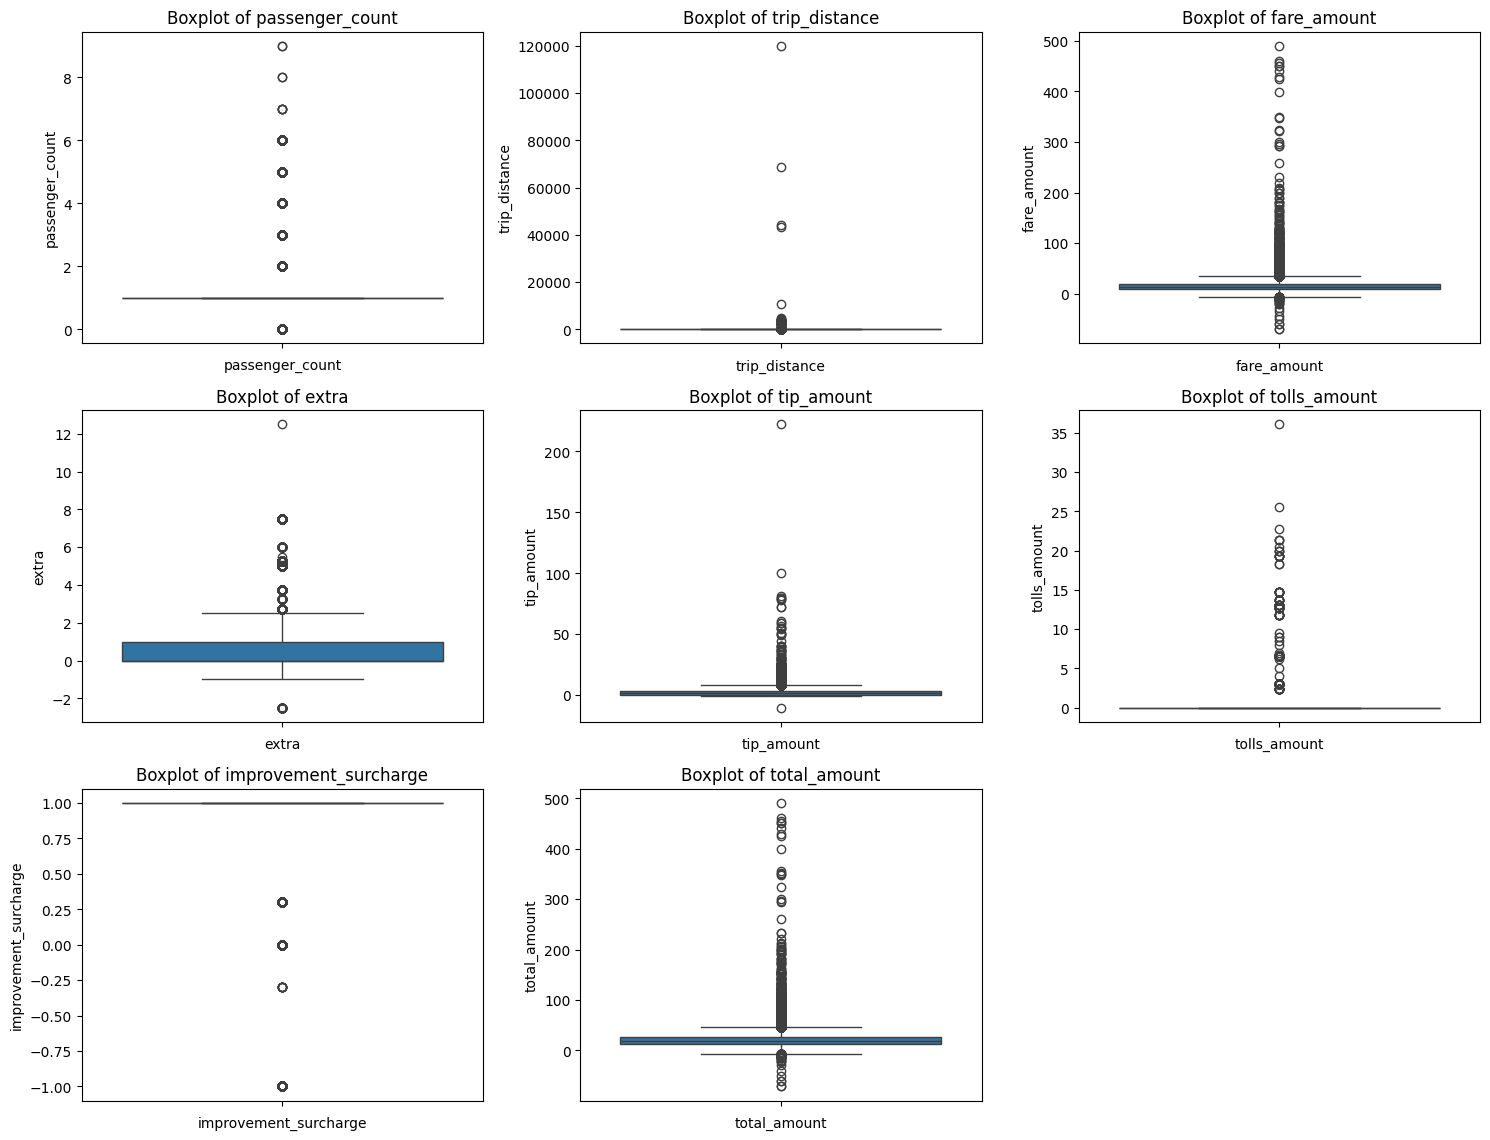

In [81]:
#membuat daftar kolom numerik
numerical_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
#Merencanakan boxplot untuk nilai numerik
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_cleaned[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

Dari hasil diatas
<ul>
<li>fare_amount dan tip_amount memiliki distribusi yang lebih bervariasi dengan banyak outlier, menunjukkan bahwa ada perjalanan dengan tarif dasar dan tip yang sangat tinggi.</li>
<li>extra dan tolls_amount juga memiliki beberapa outlier, tetapi distribusinya lebih terkonsentrasi.</li>
<li>improvement_surcharge memiliki distribusi yang sangat konsisten tanpa outlier yang signifikan.</li>
</ul>

Boxplot ini membantu mengidentifikasi komponen tarif yang memiliki variasi besar dan outlier, yang dapat menjadi fokus untuk analisis lebih lanjut atau penyesuaian tarif.

# **DATA ANALYSIS**

# Distribusi perjalanan

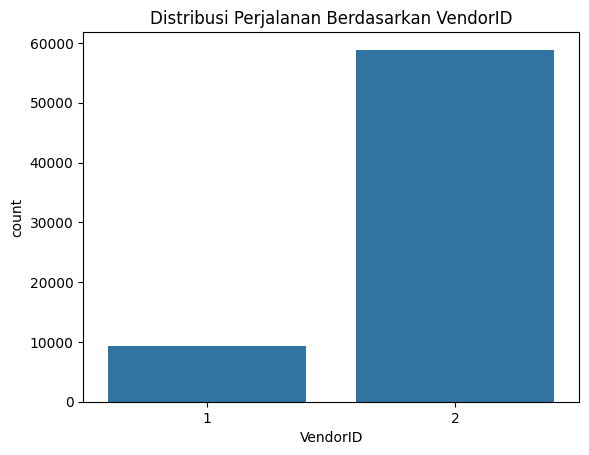

In [82]:
# Analisis distribusi perjalanan berdasarkan VendorID
sns.countplot(data=df_cleaned, x='VendorID')
plt.title('Distribusi Perjalanan Berdasarkan VendorID')
plt.show()

Grafik di atas menunjukkan distribusi perjalanan berdasarkan VendorID. Dari grafik tersebut, kita dapat melihat bahwa ada dua VendorID yang berbeda yang menyediakan layanan taksi. 

Insight:
1. VendorID 2 memiliki jumlah perjalanan yang lebih banyak dibandingkan dengan VendorID 1. Hal ini menunjukkan bahwa VendorID 2 lebih populer atau lebih sering digunakan oleh penumpang.
2. Perbedaan jumlah perjalanan antara kedua VendorID ini dapat menjadi bahan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi preferensi penumpang terhadap masing-masing vendor.




# Rata - rata tarif

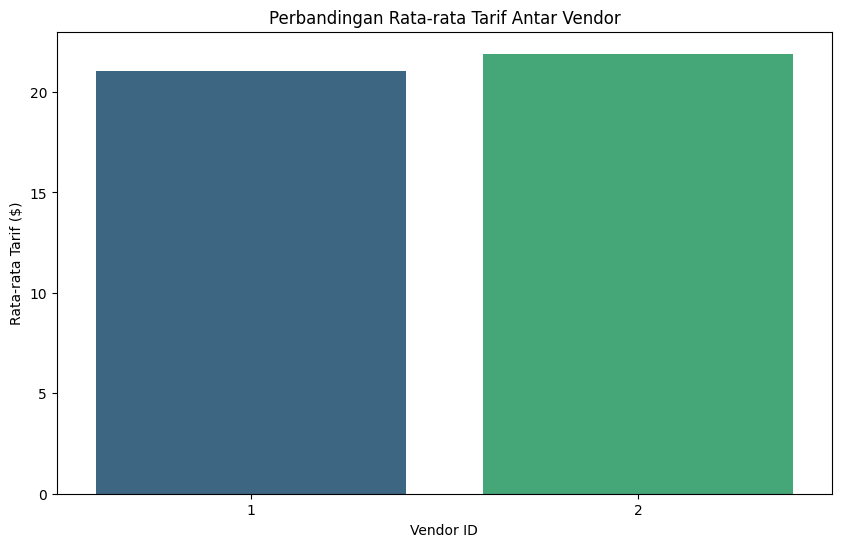

In [83]:
# Menghitung rata-rata tarif untuk masing-masing vendor
vendor_fare_avg = df_cleaned.groupby('VendorID')['total_amount'].mean().reset_index()
vendor_fare_avg.columns = ['VendorID', 'avg_fare']

# Memfilter hanya untuk VendorID 1 dan VendorID 2
vendor_fare_avg = vendor_fare_avg[vendor_fare_avg['VendorID'].isin([1, 2])]

# Membuat grafik perbandingan rata-rata tarif antar vendor
plt.figure(figsize=(10, 6))
sns.barplot(data=vendor_fare_avg, x='VendorID', y='avg_fare', palette='viridis')
plt.title('Perbandingan Rata-rata Tarif Antar Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Rata-rata Tarif ($)')
plt.xticks(rotation=0)
plt.show()

Grafik di atas menunjukkan perbandingan rata-rata tarif antar vendor. Dari grafik tersebut, kita dapat melihat bahwa rata-rata tarif untuk VendorID 2 lebih tinggi dibandingkan dengan VendorID 1.

Insight:
1. VendorID 2 memiliki rata-rata tarif yang lebih tinggi dibandingkan dengan VendorID 1. Hal ini mungkin disebabkan oleh beberapa faktor seperti jarak perjalanan yang lebih jauh, waktu perjalanan yang lebih lama, atau adanya tambahan biaya seperti tip dan tol.
2. Perbedaan rata-rata tarif ini dapat menjadi bahan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi perbedaan tarif antara kedua vendor. Misalnya, kita dapat menganalisis komponen tarif seperti fare_amount, extra, mta_tax, improvement_surcharge, tip_amount, dan tolls_amount untuk setiap vendor.


# Rata - rata tarif detail

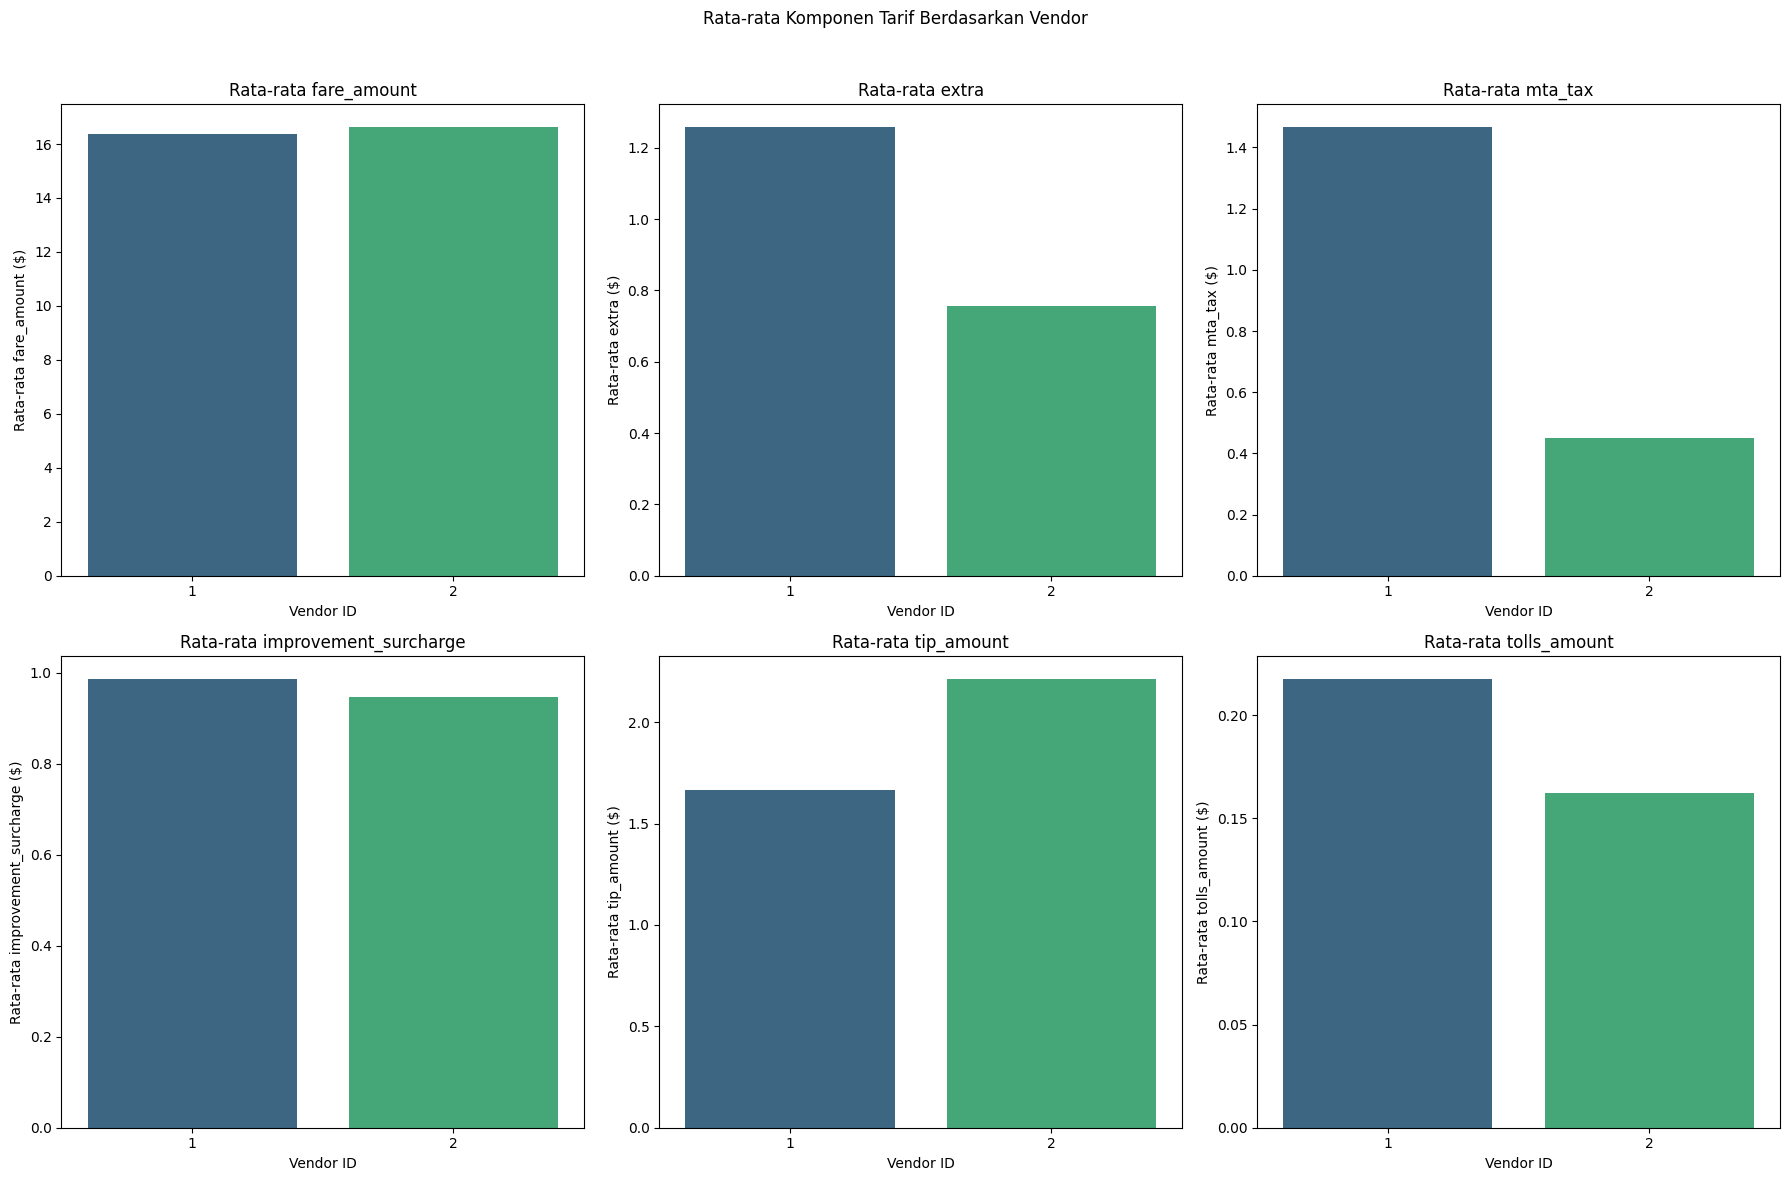

In [84]:
# Filter data untuk hanya menyertakan Vendor 1 dan Vendor 2
df_cleaned_filtered = df_cleaned[df_cleaned['VendorID'].isin([1, 2])]

# Menghitung rata-rata tarif untuk masing-masing vendor
vendor_fare_avg = df_cleaned_filtered.groupby('VendorID')['total_amount'].mean().reset_index()
vendor_fare_avg.columns = ['VendorID', 'avg_fare']

# Membandingkan rata-rata komponen tarif (fare_amount, extra, mta_tax, improvement_surcharge, tip_amount, tolls_amount) untuk setiap vendor
components = ['fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount', 'tolls_amount']
avg_components = df_cleaned_filtered.groupby('VendorID')[components].mean()

# Visualisasi komponen tarif
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Rata-rata Komponen Tarif Berdasarkan Vendor')

for i, component in enumerate(components):
    row = i // 3
    col = i % 3
    sns.barplot(data=avg_components, x='VendorID', y=component, palette='viridis', ax=axes[row, col])
    axes[row, col].set_title(f'Rata-rata {component}')
    axes[row, col].set_xlabel('Vendor ID')
    axes[row, col].set_ylabel(f'Rata-rata {component} ($)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Grafik di atas menunjukkan perbandingan rata-rata komponen tarif (fare_amount, extra, mta_tax, improvement_surcharge, tip_amount, tolls_amount) berdasarkan VendorID. Dari grafik tersebut, kita dapat melihat perbedaan rata-rata komponen tarif antara VendorID 1 dan VendorID 2.

Insight:
1. VendorID 2 cenderung memiliki rata-rata fare_amount yang lebih tinggi dibandingkan dengan VendorID 1. Hal ini mungkin disebabkan oleh jarak perjalanan yang lebih jauh atau durasi perjalanan yang lebih lama.
2. Rata-rata extra untuk VendorID 1 lebih tinggi dibandingkan dengan VendorID 2, menunjukkan bahwa ada biaya tambahan yang lebih pada VendorID 1.
3. Rata-rata mta_tax untuk untuk VendorID 1 lebih tinggi dibandingkan dengan VendorID 2.
4. VendorID 1 memiliki rata-rata improvement_surcharge yang lebih tinggi dibandingkan dengan VendorID 2, yang mungkin menunjukkan adanya biaya tambahan yang lebih sering dikenakan pada perjalanan dengan VendorID 1.
5. Rata-rata tip_amount untuk VendorID 2 lebih tinggi dibandingkan dengan VendorID 1, yang mungkin menunjukkan bahwa penumpang cenderung memberikan tip lebih besar untuk perjalanan dengan VendorID 2.
6. Rata-rata tolls_amount VendorID 1 lebih tinggi dibandingkan dengan VendorID 2.

# Distribusi waktu penjemputan dan pengantaran

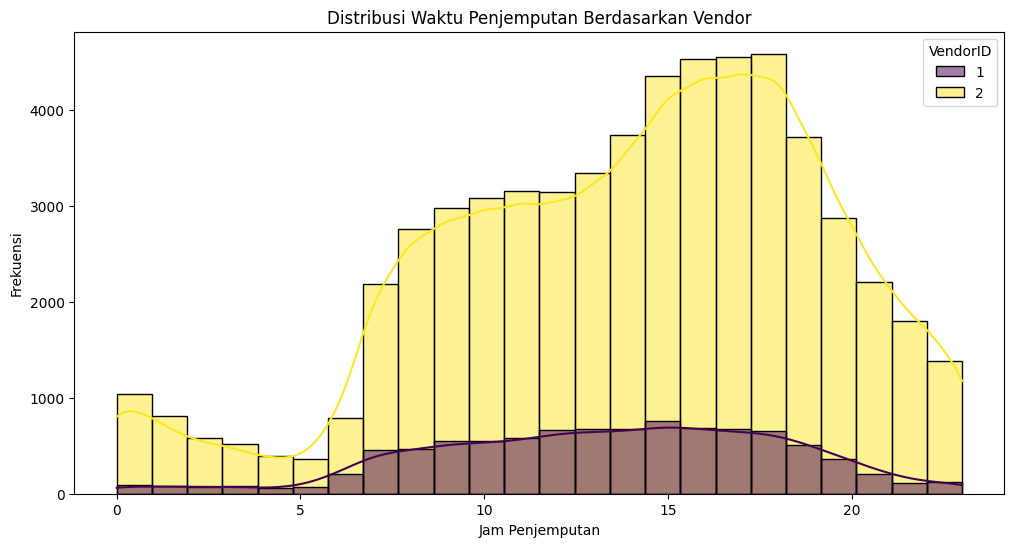

In [85]:
# Membandingkan distribusi waktu perjalanan (pickup and dropoff times) untuk setiap vendor
df_cleaned['pickup_hour'] = pd.to_datetime(df_cleaned['lpep_pickup_datetime']).dt.hour
df_cleaned['dropoff_hour'] = pd.to_datetime(df_cleaned['lpep_dropoff_datetime']).dt.hour

plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='pickup_hour', hue='VendorID', kde=True, palette='viridis', bins=24)
plt.title('Distribusi Waktu Penjemputan Berdasarkan Vendor')
plt.xlabel('Jam Penjemputan')
plt.ylabel('Frekuensi')
plt.show()

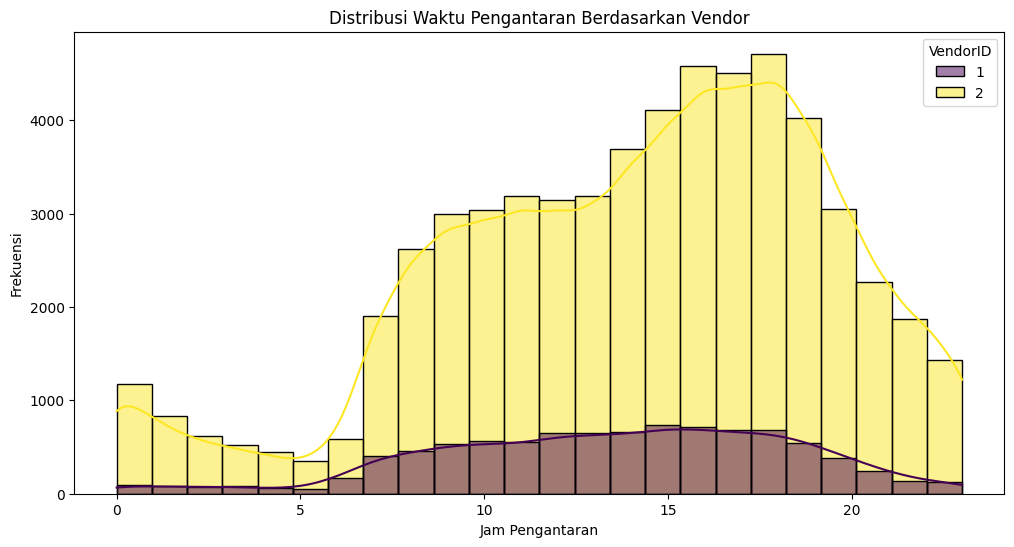

In [86]:

plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='dropoff_hour', hue='VendorID', kde=True, palette='viridis', bins=24)
plt.title('Distribusi Waktu Pengantaran Berdasarkan Vendor')
plt.xlabel('Jam Pengantaran')
plt.ylabel('Frekuensi')
plt.show()

Grafik di atas menunjukkan distribusi waktu penjemputan dan pengantaran berdasarkan VendorID. Dari grafik tersebut, kita dapat melihat pola waktu penjemputan dan pengantaran untuk masing-masing vendor.
 
Insight:
1. Distribusi waktu penjemputan menunjukkan bahwa kedua vendor memiliki puncak penjemputan pada jam-jam tertentu, terutama pada pagi hari dan sore hari. Hal ini mungkin disebabkan oleh aktivitas komuter yang tinggi pada jam-jam tersebut.
2. Distribusi waktu pengantaran juga menunjukkan pola yang mirip dengan waktu penjemputan, dengan puncak pada pagi hari dan sore hari. Ini menunjukkan bahwa perjalanan cenderung terjadi dalam rentang waktu yang konsisten.
3. Tidak ada perbedaan signifikan antara distribusi waktu penjemputan dan pengantaran untuk VendorID 1 dan VendorID 2, menunjukkan bahwa kedua vendor melayani penumpang pada waktu yang hampir sama.


# Distribusi lokasi penjemputan dan pengantaran

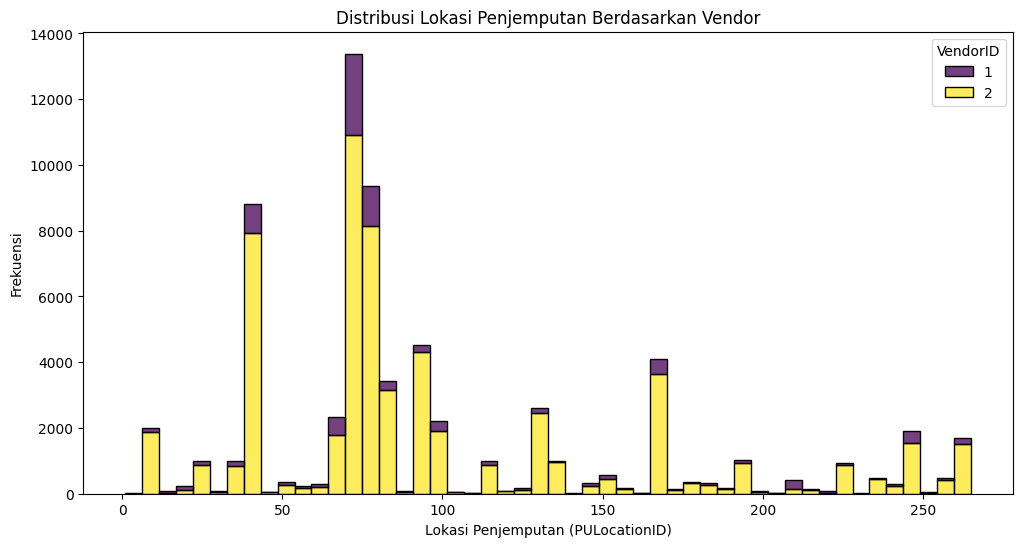

In [87]:
# Membuat kolom tambahan untuk jam penjemputan dan pengantaran
df_cleaned['pickup_hour'] = pd.to_datetime(df_cleaned['lpep_pickup_datetime']).dt.hour
df_cleaned['dropoff_hour'] = pd.to_datetime(df_cleaned['lpep_dropoff_datetime']).dt.hour

# Membandingkan distribusi lokasi penjemputan untuk setiap vendor
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='PULocationID', hue='VendorID', kde=False, palette='viridis', bins=50, multiple="stack")
plt.title('Distribusi Lokasi Penjemputan Berdasarkan Vendor')
plt.xlabel('Lokasi Penjemputan (PULocationID)')
plt.ylabel('Frekuensi')
plt.show()


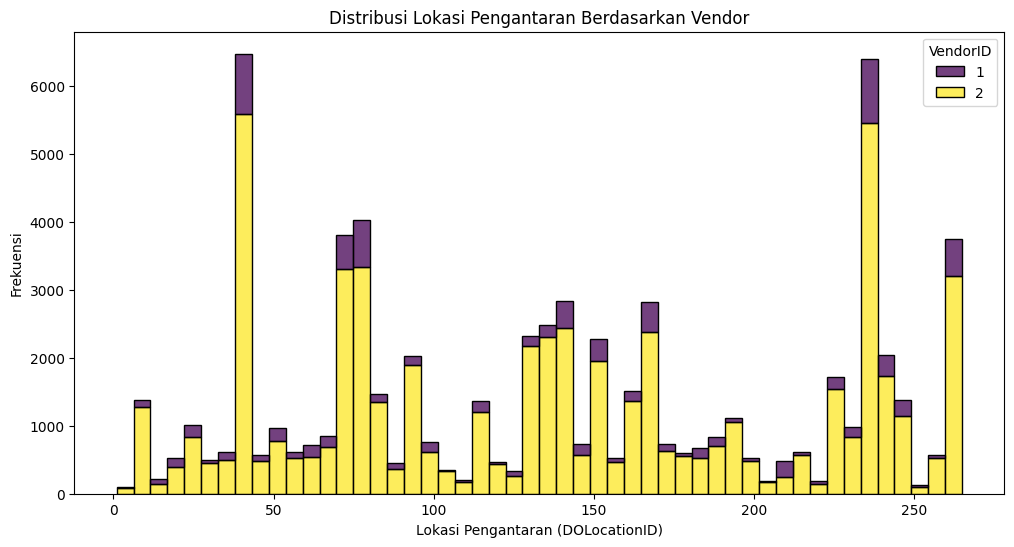

In [88]:
# Membandingkan distribusi lokasi pengantaran untuk setiap vendor
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='DOLocationID', hue='VendorID', kde=False, palette='viridis', bins=50, multiple="stack")
plt.title('Distribusi Lokasi Pengantaran Berdasarkan Vendor')
plt.xlabel('Lokasi Pengantaran (DOLocationID)')
plt.ylabel('Frekuensi')
plt.show()



Grafik di atas menunjukkan distribusi lokasi penjemputan dan pengantaran berdasarkan VendorID. Dari grafik tersebut, kita dapat melihat pola lokasi penjemputan dan pengantaran untuk masing-masing vendor.
 
Insight:
1. Distribusi lokasi penjemputan menunjukkan bahwa terdapat beberapa lokasi yang lebih sering digunakan sebagai titik penjemputan oleh kedua vendor. Hal ini mungkin disebabkan oleh tingginya permintaan di lokasi-lokasi tersebut.
2. Distribusi lokasi pengantaran juga menunjukkan pola yang mirip dengan lokasi penjemputan, dengan beberapa lokasi yang lebih sering digunakan sebagai titik pengantaran. Ini menunjukkan bahwa perjalanan cenderung berakhir di lokasi-lokasi yang sama.
3. Tidak ada perbedaan signifikan antara distribusi lokasi penjemputan dan pengantaran untuk VendorID 1 dan VendorID 2, menunjukkan bahwa kedua vendor melayani penumpang di lokasi yang hampir sama.


# Jumlah Perjalanan per jam

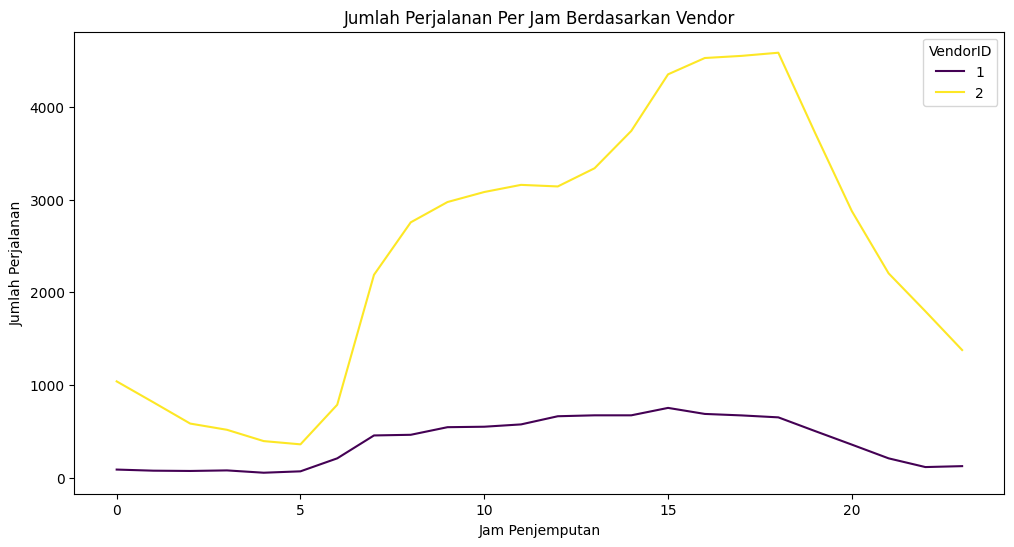

In [89]:

# Menghitung jumlah perjalanan per jam untuk masing-masing vendor
trips_per_hour = df_cleaned.groupby(['VendorID', 'pickup_hour']).size().reset_index(name='trip_count')

# Membuat grafik jumlah perjalanan per jam untuk masing-masing vendor
plt.figure(figsize=(12, 6))
sns.lineplot(data=trips_per_hour, x='pickup_hour', y='trip_count', hue='VendorID', palette='viridis')
plt.title('Jumlah Perjalanan Per Jam Berdasarkan Vendor')
plt.xlabel('Jam Penjemputan')
plt.ylabel('Jumlah Perjalanan')
plt.show()

Grafik di atas menunjukkan jumlah perjalanan per jam berdasarkan VendorID. Dari grafik tersebut, kita dapat melihat pola jumlah perjalanan yang dilakukan oleh masing-masing vendor pada setiap jam.
 
Insight:
1. Jumlah perjalanan cenderung meningkat pada jam-jam sibuk, seperti pagi hari dan sore hari, yang mungkin disebabkan oleh tingginya permintaan pada jam-jam tersebut.
2. Terdapat perbedaan jumlah perjalanan antara VendorID 1 dan VendorID 2 pada beberapa jam tertentu, yang mungkin menunjukkan perbedaan strategi operasional atau preferensi penumpang.
3. Pada jam-jam tertentu, jumlah perjalanan menurun drastis, yang mungkin disebabkan oleh rendahnya permintaan atau kebijakan operasional dari masing-masing vendor.


# Distribusi pembayaran

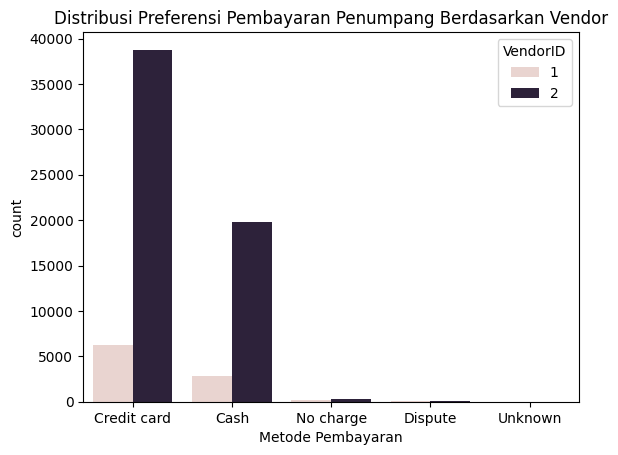

In [90]:
# Analisis distribusi pembayaran
sns.countplot(data=df_cleaned.replace({'payment_type': {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'}}), x='payment_type', hue='VendorID')
plt.title('Distribusi Preferensi Pembayaran Penumpang Berdasarkan Vendor')
plt.xlabel('Metode Pembayaran')
plt.show()

Grafik di atas menunjukkan distribusi preferensi pembayaran penumpang. Dari grafik tersebut, kita dapat melihat bahwa ada variasi preferensi pembayaran yang digunakan oleh penumpang.

Insight:
1. Terdapat metode pembayaran yang lebih sering digunakan oleh penumpang, yang mungkin menunjukkan preferensi atau kenyamanan dalam menggunakan metode tersebut.
2. Metode pembayaran yang kurang populer mungkin menunjukkan bahwa penumpang kurang nyaman atau kurang familiar dengan metode tersebut.


# **KESIMPULAN**
1. Distribusi Perjalanan Berdasarkan Vendor:
- VendorID 2 memiliki jumlah perjalanan yang lebih banyak dibandingkan dengan VendorID 1.
- Rata-rata tarif untuk VendorID 2 lebih tinggi dibandingkan dengan VendorID 1, yang mungkin disebabkan oleh jarak perjalanan yang lebih jauh, waktu perjalanan yang lebih lama, atau adanya tambahan biaya seperti tip dan tol.
2. Komponen Tarif:
- VendorID 2 cenderung memiliki rata-rata fare_amount dan tip_amount yang lebih tinggi dibandingkan dengan VendorID 1.
- VendorID 2 memiliki rata-rata improvement_surcharge yang lebih tinggi dibandingkan dengan VendorID 1.
3. Distribusi Waktu Penjemputan dan Pengantaran:
- Kedua vendor memiliki puncak penjemputan dan pengantaran pada pagi hari dan sore hari, menunjukkan aktivitas komuter yang tinggi pada jam-jam tersebut.
- Tidak ada perbedaan signifikan antara distribusi waktu penjemputan dan pengantaran untuk VendorID 1 dan VendorID 2.
4. Distribusi Lokasi Penjemputan dan Pengantaran:
- Terdapat beberapa lokasi yang lebih sering digunakan sebagai titik penjemputan dan pengantaran oleh kedua vendor.
- Tidak ada perbedaan signifikan antara distribusi lokasi penjemputan dan pengantaran untuk VendorID 1 dan VendorID 2.
5. Jumlah Perjalanan Per Jam:
- Jumlah perjalanan cenderung meningkat pada jam-jam sibuk, seperti pagi hari dan sore hari.
- Terdapat perbedaan jumlah perjalanan antara VendorID 1 dan VendorID 2 pada beberapa jam tertentu.
6. Distribusi Preferensi Pembayaran:
- Terdapat metode pembayaran yang lebih sering digunakan oleh penumpang, menunjukkan preferensi atau kenyamanan dalam menggunakan metode tersebut.

# **Rekomendasi**
1. Optimalisasi Operasional:
- VendorID 1 dapat mengevaluasi strategi operasionalnya untuk meningkatkan jumlah perjalanan, terutama pada jam-jam sibuk.
- Kedua vendor dapat mempertimbangkan untuk menambah armada atau meningkatkan layanan pada lokasi-lokasi dengan permintaan tinggi.
2. Penyesuaian Tarif:
- VendorID 1 dapat mempertimbangkan untuk menyesuaikan tarifnya agar lebih kompetitif dengan VendorID 2, terutama pada komponen mta tax.
- Analisis lebih lanjut diperlukan untuk memahami faktor-faktor yang mempengaruhi perbedaan tarif antara kedua vendor.
3. Peningkatan Layanan:
- Kedua vendor dapat meningkatkan layanan pada jam-jam sibuk untuk mengakomodasi tingginya permintaan.
- Peningkatan layanan di lokasi-lokasi dengan permintaan tinggi dapat meningkatkan kepuasan pelanggan.
4. Metode Pembayaran:
- Kedua vendor dapat mempertimbangkan untuk mempromosikan metode pembayaran yang kurang populer untuk meningkatkan kenyamanan penumpang.
- Menyediakan berbagai opsi pembayaran yang mudah dan aman dapat meningkatkan pengalaman pelanggan.